# U.S. Medical Insurance Costs

In [59]:
import pandas as pd
insurance = pd.read_csv('insurance.csv')
print(insurance.head())
insurance.describe()

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
insurance['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

## Scope of the project

- To reveal the most influential individual characteristics on insurance charge


In [208]:
class Insurance:
    def __init__(self, fname):
        self.df = pd.read_csv(fname)
        self.df2attr()
        LinearRegression.__init__(self)

    def df2attr(self):
        self.age = self.df['age']
        self.sex = self.df['sex']
        self.bmi = self.df['bmi']
        self.children = self.df['children']
        self.smoker = self.df['smoker']
        self.region = self.df['region']
        self.charges = self.df['charges']

    def add(self, **kwargs):
        newdata = pd.DataFrame({'age':[kwargs['age']],
                                'sex':[kwargs['sex']],
                                'bmi':[kwargs['bmi']],
                                'children':[kwargs['children']],
                                'smoker':[kwargs['smoker']],
                                'region':[kwargs['region']],
                                'charges':[kwargs['charges']],
                                })
        self.df = pd.concat([self.df, newdata], axis=0)
        self.df = self.df.reset_index(drop=True)
        print('New record was added:')
        print(newdata)

    def __repr__(self):
        print(str(self.df.head()))
        return str(self.df.tail())

    def get_dummies(self):
        self.df = pd.get_dummies(self.df)
        del self.df['sex_female']
        del self.df['smoker_no']
        self.df = self.df.rename(columns={'smoker_yes':'smoker'})
        print(self.df)

    

ins = Insurance('insurance.csv')
ins.get_dummies()


      age     bmi  children      charges  sex_male  smoker  region_northeast  \
0      19  27.900         0  16884.92400         0       1                 0   
1      18  33.770         1   1725.55230         1       0                 0   
2      28  33.000         3   4449.46200         1       0                 0   
3      33  22.705         0  21984.47061         1       0                 0   
4      32  28.880         0   3866.85520         1       0                 0   
...   ...     ...       ...          ...       ...     ...               ...   
1333   50  30.970         3  10600.54830         1       0                 0   
1334   18  31.920         0   2205.98080         0       0                 1   
1335   18  36.850         0   1629.83350         0       0                 0   
1336   21  25.800         0   2007.94500         0       0                 0   
1337   61  29.070         0  29141.36030         0       1                 0   

      region_northwest  region_southeas

In [244]:
from sklearn.tree import DecisionTreeRegressor
import sklearn.model_selection

regressor = DecisionTreeRegressor(random_state = 0)

X = ins.df[['age', 'bmi', 'children', 'sex_male', 'smoker', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']]
y = ins.df['charges']
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y)

model = DecisionTreeRegressor(random_state=0, max_depth=4)
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
print(model.score(X_test, y_test))
print(model.score(X_train, y_train))

#cross_val_score(regressor, X, y, cv=10)

0.8562537217554984
0.8660952595656621


In [245]:
importance = pd.DataFrame({'feature_names': X.columns, 'coef':model.feature_importances_})
importance

,feature_names,coef
0,age,0.122307
1,bmi,0.167269
2,children,0.004747
3,sex_male,0.000000
4,smoker,0.702549
5,region_northeast,0.003127
6,region_northwest,0.000000
7,region_southeast,0.000000
8,region_southwest,0.000000


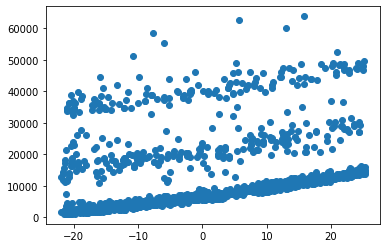

In [260]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
x_pca = pca.transform(X)
pca_df = pd.DataFrame(x_pca)
pca_df['insurance_cost'] = y

import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(pca_df[0], pca_df['insurance_cost'])
